<a href="https://colab.research.google.com/github/deoprakash/R-projects/blob/main/rainfall_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘lava’, ‘prodlim’, ‘clock’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




## **Objective 1 : Importing Libraries**

In [2]:
#importing necessary librarries

library(caret)
library(class)
library(ggplot2)

Loading required package: ggplot2

Loading required package: lattice



# **Objective 2: Load Dataset**

In [3]:
data<- read.csv("/content/Rainfall.csv")
head(data)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>
1,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80,26.3,yes
2,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50,15.3,yes
3,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40,14.2,yes
4,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50,16.9,yes
5,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40,13.7,yes
6,6,1018.8,24.3,20.9,19.2,18.0,84,51,7.7,20,14.5,yes


## **Objective 3: Preprocessing of Dataset**

In [4]:
# Handling missing values
data <- na.omit(data)


In [5]:
#Normalize the features

processed_data = preProcess(data[,-ncol(data)], method = "range")
data_normalized <- predict(processed_data, data[, -ncol(data)])

In [6]:
# Add target variable back

data_normalized$rainfall <- data$rainfall

In [7]:
#Splitting data into train and test sets
set.seed(123)
trainIndex <- createDataPartition(data_normalized$rainfall, p = 0.7, list = FALSE)
trainData <- data_normalized[trainIndex, ]
testData <- data_normalized[-trainIndex, ]

## **Objective 4: Train the Model**

In [8]:
# Train the KNN model
k_value <- 5
knn_model <- knn(train = trainData[, -ncol(trainData)],
                 test = testData[, -ncol(testData)],
                 cl = trainData$rainfall, k = k_value)


## **Objective 5 : Evaluation of Model**

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  22   6
       yes 13  68
                                          
               Accuracy : 0.8257          
                 95% CI : (0.7413, 0.8917)
    No Information Rate : 0.6789          
    P-Value [Acc > NIR] : 0.0004263       
                                          
                  Kappa : 0.5779          
                                          
 Mcnemar's Test P-Value : 0.1686686       
                                          
            Sensitivity : 0.6286          
            Specificity : 0.9189          
         Pos Pred Value : 0.7857          
         Neg Pred Value : 0.8395          
             Prevalence : 0.3211          
         Detection Rate : 0.2018          
   Detection Prevalence : 0.2569          
      Balanced Accuracy : 0.7737          
                                          
       'Positive' Class : no              
                                 

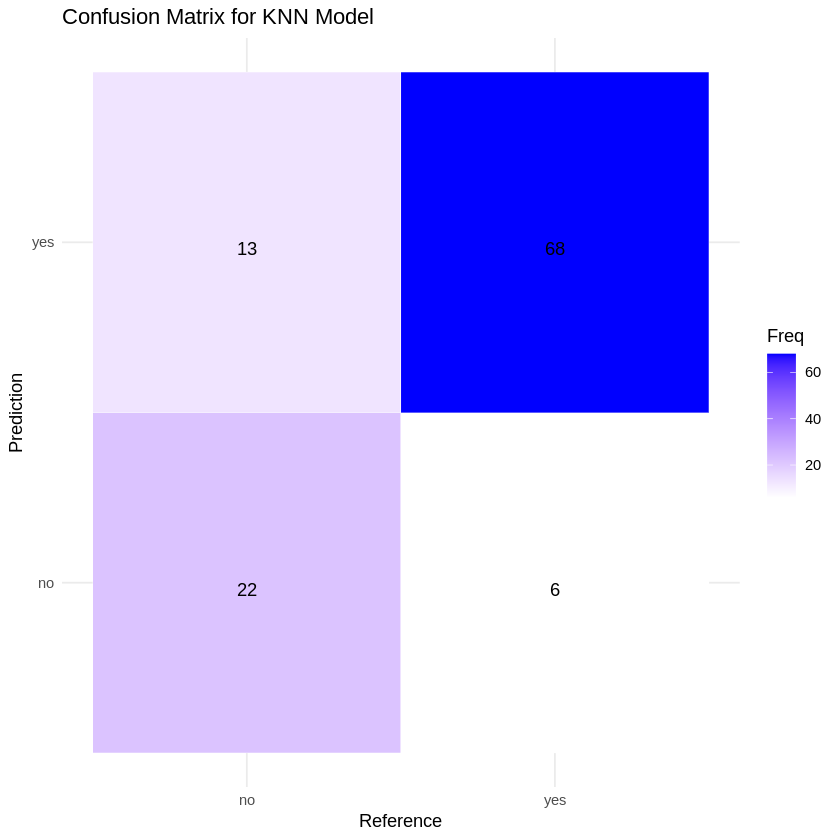

In [9]:
# Convert the target variable (Rainfall) to a factor if it's not already
testData$rainfall <- as.factor(testData$rainfall)

# Convert the predicted values to a factor
knn_pred <- as.factor(knn_model)

# Ensure both predicted and actual values have the same levels
levels(knn_pred) <- levels(testData$rainfall)

# Create a confusion matrix
conf_matrix <- confusionMatrix(knn_pred, testData$rainfall)

# Print confusion matrix and accuracy
print(conf_matrix)

# Plot confusion matrix
ggplot(as.data.frame(conf_matrix$table), aes(x = Reference, y = Prediction)) +
  geom_tile(aes(fill = Freq), color = "white") +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "blue") +
  theme_minimal() +
  ggtitle("Confusion Matrix for KNN Model")


## **Objective 6: Prediction**

In [59]:
new_data <- data.frame(day = 2,
  pressure = 1012,
  maxtemp = 30,
  temperature = 40,
  mintemp = 22,
  dewpoint = 18,
  humidity = 20,
  cloud = 20,
  sunshine = 5,
  winddirection = 180,
  windspeed = 10
)

# Assuming new_data is a dataframe with the same features as train_data
new_data_normalized <- as.data.frame(new_data)  # Normalize new data
new_predictions <- knn(train = trainData[, -ncol(trainData)],
                       test = new_data_normalized,
                       cl = trainData$rainfall,
                       k = k_value)
new_predictions


[1] yes
Levels: no yes